# SKLearn and Support Vector Machines

## Outline
 - [Reminders](#reminders)
 - [Support Vector Machines](#svm)
     - [Hinge Loss](#hinge)
 - [Building a Model](#build)
 - [Plotting/Interpretation](#plot)

***

In [71]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
#import sklearn packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from IPython.display import Image
from IPython.core.display import HTML 

## Important Notes/Reminders  <a id='reminders'> </a>
 - Homework is due 11:59PM on the due date. It is your responsibility to turn it in by that time and not wait until 11:58PM to try to upload it. Per the syllabus, I do not accept late homework.
 - You need to call `fit` in order to train a new model based on training features (predictors) and targets

## Support-Vector Machines  <a id='svm'> </a>

A <b> support-vector machine (SVM) </b> is a model that constructs a hyperplane (or set of hyperplanes) to be used for classification or regression problems. There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation,<b> or margin </b>, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. 

We will introduce these models in the context of classification. As before, let's assume we have a two class ($Y=-1$ or $Y=1$) problem with two predictors, $x_1$ and $x_2$.

If we wanted to separate the blue from the green points, we assume we have $n$ training points, of the form

$$
(\vec{x_1}, y_1), \ldots, (\vec{x_n}, y_n),
$$

Any hyperplane can be written as the set of points $\vec{x}$ satisfying
$$
{\vec {w}}\cdot {\vec {x}}-b=0.
$$

In [36]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png", width=350,height=350)

Maximum-margin hyperplane and margins for an SVM trained with samples from two classes. Samples on the margin are called the support vectors.

SVMs can also handle nonlinear decision boundaries by first transforming the features and then constructing a hyperplane separator.

### Hinge Loss  <a id='hinge'> </a>

If the data are not linearly separable, we still want to maximize this distance with a <b> soft-margin </b> using the hinge loss.

For an intended output $y = \pm 1$ and a classifier score $t$, the hinge loss of the prediction $t$ is defined as

$$
\ell(t) = \max(0, 1-y \cdot t)
$$

For SVMs, $t = \vec{w} \cdot \vec{x} - b$. 

<b> Practice! </b> Create 2 plots of the hinge loss (one for when $y = 1$ and one for $y=-1$) for different values of $t$ (let $t$ range from -10 to 10). Comment on what you notice.

In [74]:
t = np.linspace(-10,10)


<b> Practice! </b> Generate 3 different examples of simulated data (2 classes, 1000 observations) with $x_1$ and $x_2$ as features that satisfy the following: 
   - Linear Separation (<b> recreate the image above </b>)
   - Nonlinear Separation
   - Separation involving a circle
   
   Save each as a different `pandas` dataframe, plot the 3 examples separately (remember to save them as different variables)

## Building a Model  <a id='model'> </a>

With all of this in mind, let's build a support-vector classifier model for the digits data set

In [2]:
# load digits
digits = datasets.load_digits()

In [25]:
digits.data.shape

(1797, 64)

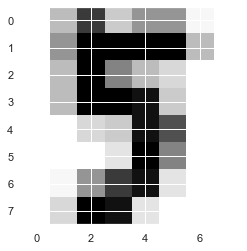

In [23]:
# explore digits data set
# we are going to use the features to predict the target
plt.imshow(digits.images[33], cmap='Greys')

In [26]:
# what are the targets?

In [41]:
# creating a training and test split
# train_test_split is a function that takes in data, targets, test size, and random state
# outputs train features, test feat., train targets, test targets 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

In [66]:
# build a model (for more than 2 classes)
clf = svm.SVC(gamma='scale')

In [67]:
# fit the model to training data
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
# predict on test data
clf.score(X_test, y_test)

0.9865319865319865

<b> Practice! </b> Use SVCs on the data you previously created and note the score for each: 
   - Linear Separation (<b> recreate the image above </b>)
   - Nonlinear Separation
   - Separation involving a circle
   
*Which score was the highest out of the 3?